In [70]:
# import the math library
import math

In [71]:
# Example dataset 
# let's say we have a dataset with the two classes A and B
# Suppose in the dataset of 10 elements, 4 belongs to class A and 6 belongs to class B

# number of elements in each class
n_A = 4
n_B = 6
total = n_A + n_B

In [72]:
# calculate the propositions 
p_A = n_A / total
p_B = n_B / total

# print the propositions
print('Proposition of class A:', p_A)
print('Proposition of class B:', p_B)

Proposition of class A: 0.4
Proposition of class B: 0.6


In [73]:
# calculating entropy 
entropy = -p_A * math.log2(p_A) - p_B * math.log2(p_B)
print('Entropy:', entropy)

Entropy: 0.9709505944546686


In [74]:
# gini empurity 
gini_empurity = 1 -p_A**2 -p_B**2
print('Gini Empurity:', gini_empurity)

Gini Empurity: 0.48


In [75]:
# Information Gain
# Assuming a split on some feature divides the dataset into two subsets
# Subset 1: 2 elements of A, 3 of B
# Subset 2: 2 elements of A, 3 of B
# Entropy and size for each subset
n_1_A, n_1_B = 2, 3
n_2_A, n_2_B = 2, 3

# calculating proposition of each subset
p_1_A = n_1_A / (n_1_A + n_1_B)
p_1_B = n_1_B / (n_1_A + n_1_B)

# calculating the entropy of first split
entropy_1 = -p_1_A * math.log2(p_1_A) - p_1_B * math.log2(p_1_B) if p_1_A and p_1_B else 0

# calculating proposition of each subset
p_2_A = n_2_A / (n_2_A + n_2_B)
p_2_B = n_2_B / (n_2_A + n_2_B)

# calculating the entropy of second split
entropy_2 = -p_2_A * math.log2(p_2_A) - p_2_B * math.log2(p_2_B) if p_2_A and p_2_B else 0

# Calculating information gain
info_gain = entropy - ((n_1_A + n_1_B) / total * entropy_1 + (n_2_A + n_2_B) / total * entropy_2) 
print("Information Gain: ", info_gain)  

Information Gain:  0.0



Based on our example dataset with two classes (A and B), we have calculated the following values:

1. `Entropy:` The calculated entropy of the dataset is approximately 0.971. This value indicates a moderate level of disorder in the dataset, considering that it's not very close to 0 (which would mean no disorder) and not at its maximum (which would mean complete disorder for a binary classification).

2. `Gini Impurity:` The Gini impurity for the dataset is 0.48. This value, being less than 0.5, suggests some level of purity in the dataset but still indicates a mix of classes A and B.

3. `Information Gain:` The information gain from the chosen split is 0.0. This result implies that the split did not reduce the entropy or disorder of the dataset. In other words, the split did not add any additional information that could help distinguish between classes A and B more effectively than before.

These metrics provide insight into the nature of the dataset and the effectiveness of potential splits when constructing a decision tree. In practical applications, you would use these calculations to choose the best feature and split at each node in the tree to maximize the purity of the subsets created.


--------
# Decision Tree Classification  

In [76]:
# import the nessesary libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
# load the dataset 
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [79]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

so we know that there are missing values in the deck, age , embarked and embarked_town columns
1. `deck has 688` missing values
2. `age has 177` missing values
3. `embarked has 2` missing values
4. `embarked_town has 2` missing values


In [80]:
df.drop('deck', axis=1, inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [81]:
# fill the missing values of age with median of age 
imputer = SimpleImputer(strategy='median')
df['age'] = imputer.fit_transform(df[['age']])

In [82]:
# fill the missing values of embarked and embarked_town with mode
imputer = SimpleImputer(strategy='most_frequent')
df[['embarked', 'embark_town']] = imputer.fit_transform(df[['embarked', 'embark_town']])

In [83]:
df.isnull().sum().sort_index(ascending=False)

who            0
survived       0
sibsp          0
sex            0
pclass         0
parch          0
fare           0
embarked       0
embark_town    0
class          0
alone          0
alive          0
age            0
adult_male     0
dtype: int64

As we know now there is no missing values in our dataset 

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [85]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object', 'category']):
    df[col] = le.fit_transform(df[col])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int64  
 8   class        891 non-null    int64  
 9   who          891 non-null    int64  
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    int64  
 12  alive        891 non-null    int64  
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(10)
memory usage: 85.4 KB


so there is no missing values in our dataset and all the columns are of numeric type or bool type as well


In [87]:
# specify the features and target or labels
X = df[['fare', 'age']]
y = df['survived']

In [88]:
# spliting the data into training and testing sets
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# call the model 
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# train the model 
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [90]:
# predict the values 
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1])

In [91]:
# evaluate the model 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73       105
           1       0.61      0.45      0.52        74

    accuracy                           0.65       179
   macro avg       0.64      0.62      0.62       179
weighted avg       0.65      0.65      0.64       179



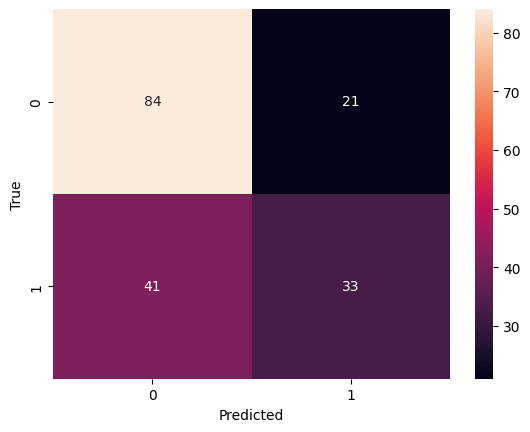

In [92]:
# create heatmap of the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [93]:
# save the model 
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='./saved_models/decision_tree.dot', feature_names=X.columns, rounded=True, filled=True)

-----
# Decision Tree Regression

In [94]:
# import the nessesary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [95]:
# import all the nessesary ML libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder 

In [96]:
# load the dataset 
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


There is no empty values in our dataset

In [98]:
# preprocessing the dataset for the use of Decision Tree algorithm
le = LabelEncoder()
for col in df.select_dtypes(include=['object', 'category']):
    df[col] = le.fit_transform(df[col])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [99]:
# separating the data as feature and target or label
X = df[['total_bill','sex', 'smoker', 'day']]
y = df['tip']

In [100]:
# spliting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
# call the model 
model = DecisionTreeRegressor(criterion= 'squared_error', random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [106]:
# predicting the model 
y_pred = model.predict(X_test)

In [107]:
# evaluate the model
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Root mean squared error:', root_mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))  

Mean squared error: 1.4270244897959183
Root mean squared error: 1.194581303133411
R2 score: -0.1416457626750427
Mean absolute error: 0.882857142857143


In [112]:
# save the model 
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='./saved_models/decision_tree2.dot', feature_names=X.columns, rounded=True, filled=True)